# COMPSCI 371 Homework 5

_**Group Members:**_ Mayur Sekhar, Jai Kasera, Rithvik Neti

### Problem 0 (3 points)

## Part 1: Hyperplane Geometry 

### Problem 1.1 (Exam Style)

A. Formulas for conversions between hyperplane representations

1. Normal Vector and Projection: The vector $\textbf{w}$ is the normal vector to the hyperplane, and $\textbf{p}$ must also be normal in order to represent the point on the hyperplane with the shortest distance to the origin. Hence, $\textbf{p}$ is a scalar multiple of $\textbf{w}$, i.e., $\textbf{p} = c\textbf{w}$. Substituting $\textbf{x} = \textbf{p}$ into the hyperplane equation, we get:
$$
b + \textbf{w} \cdot \textbf{x} = 0
$$
Substituting $\textbf{p}$:
$$
b + \textbf{w} \cdot \textbf{p} = 0
$$
Since $\textbf{p} = c\textbf{w}$:
$$
b + \textbf{w} \cdot c\textbf{w} = 0
$$
Simplifying:
$$
b + c\lVert\textbf{w}\rVert^2 = 0
$$
Solving for $c$:
$$
c = -\frac{b}{\lVert\textbf{w}\rVert^2}
$$
Therefore, $\textbf{p} = -\frac{b}{\lVert\textbf{w}\rVert^2}\textbf{w}$.

Additionally, every column of $U$ is orthogonal to $\textbf{w}$, but $U$ is not unique. Hence, $U$ is one of the possible orthonormal matrices that spans the subspace orthogonal to $\textbf{w}$, i.e., $U \in \textbf{w}^\perp$. If $U$ is not already orthonormal, we can apply the Gram-Schmidt process to make it so.

Conversion from implicit representation $(b, w)$ to canonical representation $(p, U)$:
$$
p = -\frac{b}{\|w\|^2} w
$$
$$
U = w^\perp
$$
where $w^\perp$ denotes any orthonormal basis of the subspace orthogonal to \(w\).

2. Parametric to Implicit Representation:
The vector $\textbf{w}$ is orthogonal to the hyperplane and therefore orthogonal to every column of matrix $A$, implying $A^T \textbf{w} = \textbf{0}$. This shows that $\textbf{w}$ lies in the kernel of $A^T$, i.e., $\textbf{w} \in \text{ker}(A^T)$. Since the null space of $A^T$ is orthogonal to the row space of $A$, we conclude that $\textbf{w} \in (A)^\perp$.

Now, substituting $\textbf{x} = \textbf{a} + A\alpha$ into the equation $b + \textbf{w} \cdot \textbf{x} = 0$, we get:
$$
b + \textbf{w} \cdot (\textbf{a} + A\alpha) = 0
$$
Expanding:
$$
b + \textbf{w} \cdot \textbf{a} + \textbf{w}^T A \alpha = 0
$$
Since $\textbf{w}^T A = 0$, this simplifies to:
$$
b + \textbf{w} \cdot \textbf{a} = 0
$$
Thus:
$$
b = -\textbf{w}^T \textbf{a}
$$

Conversion from parametric representation $(a, A)$ to implicit representation $(b, w)$:

   - $w\in A^T$.
   - $b = -w \cdot a$.


B. Numerical expressions for the sample hyperplanes

1. Hyperplane $H_1$:

   - Implicit representation:
     $$
     b = -3, \quad w = (0)
     $$
     (since it's a point).
   - Canonical representation:
     $$
     p = (3), \quad U = \emptyset
     $$
     (since it's a point in $\mathbb{R}$).

2. Hyperplane $H_2$:

   - Implicit representation:
     Find $w$ orthogonal to the vectors $u_0 = (4, 0)$ and $u_1 = (0, 3)$:
     $$
     w = (3, 4), \quad b = -w \cdot u_0 = -12
     $$
   
   - Canonical representation:
     $$
     p = \frac{12}{25} \begin{bmatrix}3\\4\end{bmatrix}
     $$
     (the point on the line closest to the origin).
     $$
     U = \frac{1}{5} \begin{bmatrix}-4\\3\end{bmatrix}
     $$

3. Hyperplane $H_3$:

   - Implicit representation:
     $$
     b = -12, \quad w = (1, 4, 8)
     $$
   
   - Canonical representation:
     $$
     p = \frac{12}{81} \begin{bmatrix}1\\4\\8\end{bmatrix}
     $$
     Using Gram-Schmidt to find $U$ orthogonal to $w$, we get:
     $$
     U = \left( \begin{array}{cc}
     -\frac{4}{\sqrt{17}} & -\frac{8}{9\sqrt{17}} \\
     \frac{1}{\sqrt{17}} & -\frac{32}{9\sqrt{17}} \\
     0 & \frac{17}{9\sqrt{17}}
     \end{array} \right)
     $$

In [1]:
import numpy as np

w = np.array([1, 4, 8])
U = np.array([[-4/np.sqrt(17), -8/(9*np.sqrt(17))], 
              [1/np.sqrt(17), -32/(9*np.sqrt(17))], 
              [0, 17/(9*np.sqrt(17))]])
with np.printoptions(precision=6, suppress=True):
    print(np.dot(U.T, U), end='\n\n')
    print(np.dot(w, U))

[[1. 0.]
 [0. 1.]]

[0. 0.]


### Problem 1.2 (Exam Style)

The signed Euclidean distance $\Delta_d$ from point $p$ to the hyperplane $S_d$ (with implicit equation $\sum_{i=1}^d x_i - 1 = 0$) can be computed as:

$$
\Delta_d(p) = \frac{\sum_{i=1}^{d} p_i - 1}{\sqrt{d}}
$$

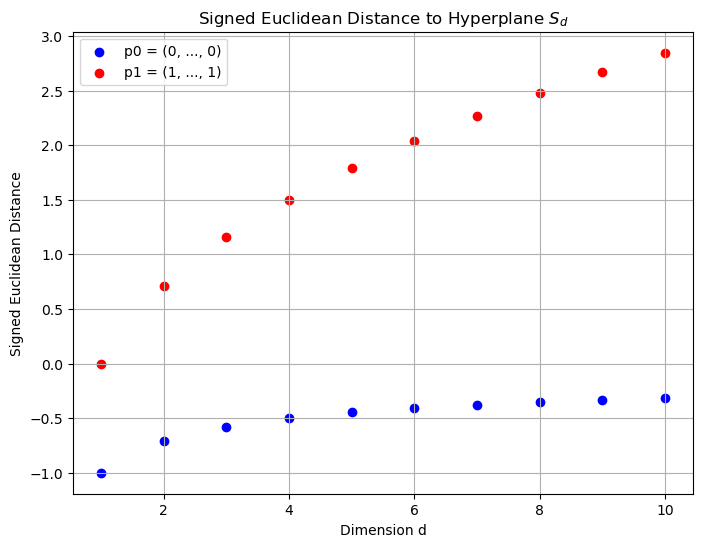

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def signed_distance(p, d):
    return (np.sum(p) - 1) / np.sqrt(d)

d_values = np.arange(1, 11)

p0 = np.zeros(10)
p1 = np.ones(10)

d_p0 = [signed_distance(p0[:d], d) for d in d_values]
d_p1 = [signed_distance(p1[:d], d) for d in d_values]

plt.figure(figsize=(8, 6))
plt.scatter(d_values, d_p0, label='p0 = (0, ..., 0)', color='blue')
plt.scatter(d_values, d_p1, label='p1 = (1, ..., 1)', color='red')

plt.xlabel('Dimension d')
plt.ylabel('Signed Euclidean Distance')
plt.title('Signed Euclidean Distance to Hyperplane $S_d$')
plt.legend()
plt.grid(True)

plt.show()


### Problem 1.3 (Exam Style)

1. For $\ell_1: x = \alpha (1, 1, 1)$:
   - The parametric form intersects $S_3$ since $\sum x_i = 1$ for $\alpha = 1/3$.
   - Point of intersection: $(\frac{1}{3}, \frac{1}{3}, \frac{1}{3})$.

2. For $\ell_2: x = \alpha (1, -1, 0)$:
   - Does not intersect $S_3$. Compute the shortest distance and closest points:
     - Distance = $\frac{1}{\sqrt{3}}$.
     - All of the points on $\ell_2$, are nearest to $\mathcal{S}_3$.  
     - Closest Points on line: $(t+\frac{1}{3}, -t+\frac{1}{3}, \frac{1}{3})$ ($t\in\mathbb{R}$) are on $\mathcal{S}_3$ and nearest to $\ell_2$.  

3. For $\ell_3: x = (1, 1, 1) + \alpha (1, -1, 0)$:
   - Does not intersect $S_3$. Compute the shortest distance and closest points:
     - Distance = $\frac{2}{\sqrt{3}}$.
     - All of the points on $\ell_3$, are nearest to $\mathcal{S}_3$. 
     - Closest Points on line: $(t+\frac{1}{3}, -t+\frac{1}{3}, \frac{1}{3})$ ($t\in\mathbb{R}$) are on $\mathcal{S}_3$ and nearest to $\ell_3$. 

4. For $\ell_1$ and $\ell_2$:  
    - They intersect at $(0,0,0)$.  
  
5. For $\ell_2$ and $\ell_3$:
    - Does not intersect. Compute the shortest distance and closest points:
     - Distance = $\sqrt{3}$.
     - All of the points on $\ell_2$ are nearest to $\ell_3$ and all of the points on $\ell_3$ are nearest to $\ell_2$. 

6. For $\ell_1$ and $\ell_3$:  
    - They intersect at $(1,1,1)$  

7. For $\ell_1$ and $\ell_4$:
    Does not intersect. Compute the shortest distance and closest points:
     - Distance = $2\sqrt{2}$.
     - Closest Points on line: $(2,2,2)$ on $\ell_1$ is nearest to $\ell_4$. and $(2,4,0)$ on $\ell_4$ is nearest to $\ell_1$.